In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the data in
Data = pd.read_csv(r"D:\Mahesh\IMARTICUS\Machine Learning with python\Logistic regression\water_potability.csv")

In [3]:
Data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,not potable
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,not potable
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,not potable
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,not potable
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,not potable


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


In [5]:
Data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [6]:
Data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
for column in ['ph','Sulfate','Trihalomethanes']:
    Data[column].fillna(Data[column].median(), inplace=True)

In [8]:
Data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph'>

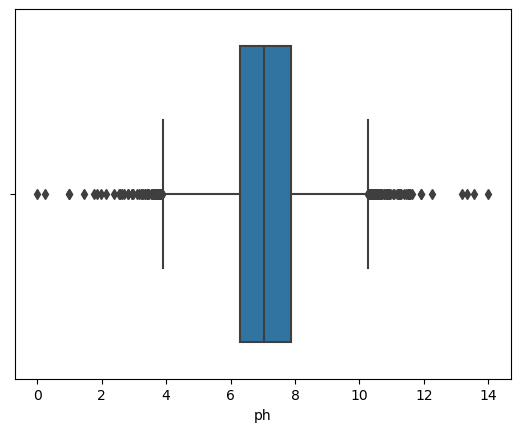

In [9]:
import seaborn as sns
sns.boxplot(Data.ph)

In [10]:
q1 = Data['ph'].quantile(0.25)
q3 = Data['ph'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [11]:
Data['ph']=np.where(Data['ph'] > upper_limit,upper_limit,Data['ph']) # upper limit

In [12]:
Data['ph']=np.where(Data['ph'] < low_limit,low_limit,Data['ph']) # low_limit

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph'>

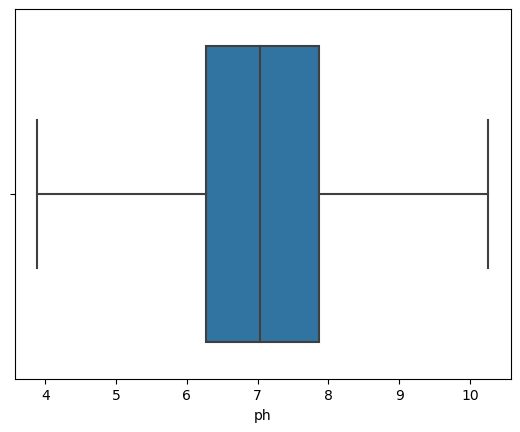

In [13]:
sns.boxplot(Data.ph)

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hardness'>

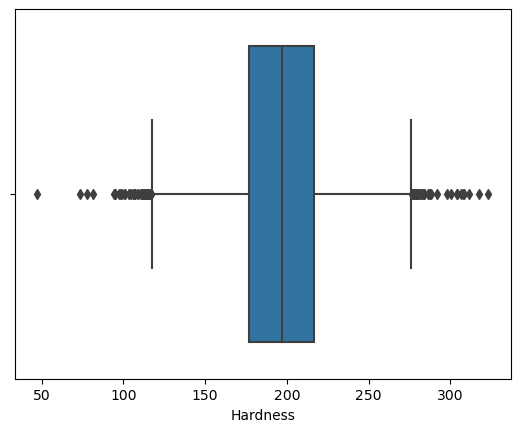

In [14]:
sns.boxplot(Data.Hardness)

In [15]:
q1 = Data['Hardness'].quantile(0.25)
q3 = Data['Hardness'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [16]:
Data['Hardness']=np.where(Data['Hardness'] > upper_limit,upper_limit,Data['Hardness']) # upper limit

In [17]:
Data['Hardness']=np.where(Data['Hardness'] < low_limit,low_limit,Data['Hardness']) # low_limit

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hardness'>

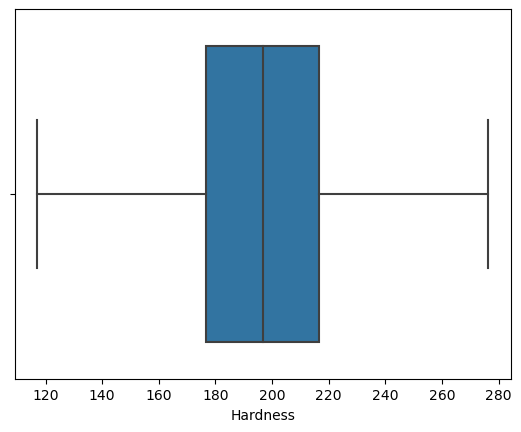

In [18]:
sns.boxplot(Data.Hardness)

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solids'>

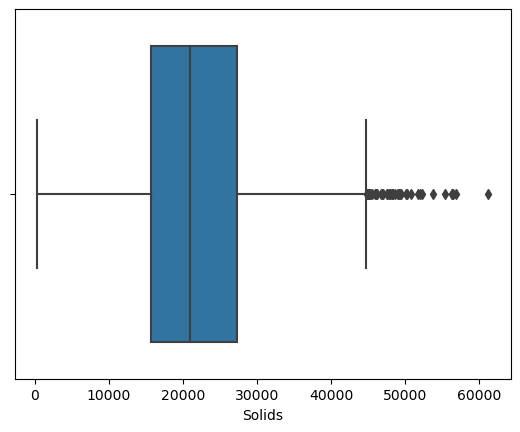

In [19]:
sns.boxplot(Data.Solids)

In [20]:
q1 = Data['Solids'].quantile(0.25)
q3 = Data['Solids'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [21]:
Data['Solids']=np.where(Data['Solids'] > upper_limit,upper_limit,Data['Solids']) # upper limit

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solids'>

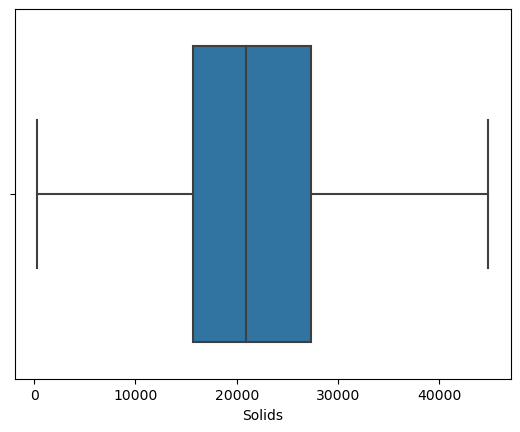

In [22]:
sns.boxplot(Data.Solids)

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chloramines'>

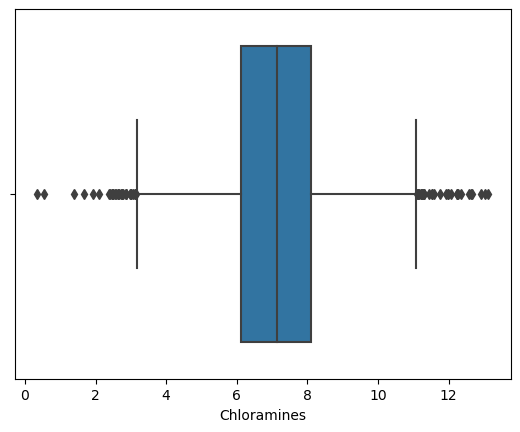

In [23]:
sns.boxplot(Data.Chloramines)

In [24]:
q1 = Data['Chloramines'].quantile(0.25)
q3 = Data['Chloramines'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [25]:
Data['Chloramines']=np.where(Data['Chloramines'] > upper_limit,upper_limit,Data['Chloramines']) # upper limit

In [26]:
Data['Chloramines']=np.where(Data['Chloramines'] < low_limit,low_limit,Data['Chloramines']) # low_limit

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chloramines'>

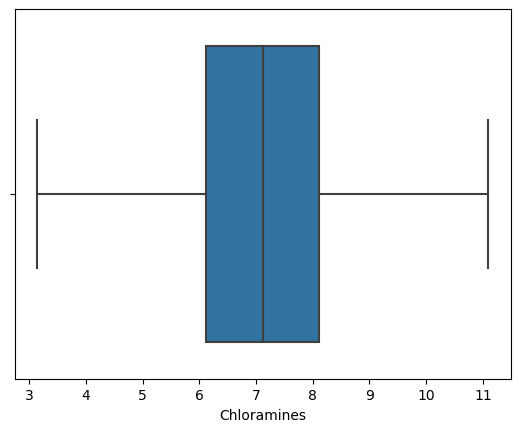

In [27]:
sns.boxplot(Data.Chloramines)

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sulfate'>

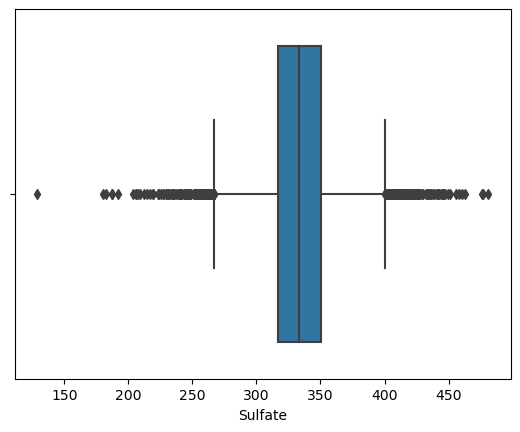

In [28]:
sns.boxplot(Data.Sulfate)

In [29]:
q1 = Data['Sulfate'].quantile(0.25)
q3 = Data['Sulfate'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [30]:
Data['Sulfate']=np.where(Data['Sulfate'] > upper_limit,upper_limit,Data['Sulfate']) # upper limit

In [31]:
Data['Sulfate']=np.where(Data['Sulfate'] < low_limit,low_limit,Data['Sulfate']) # low_limit

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sulfate'>

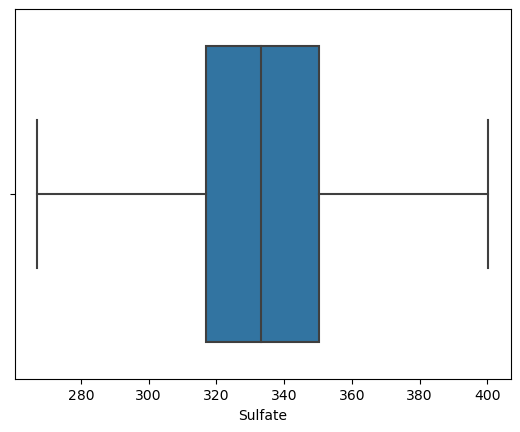

In [32]:
sns.boxplot(Data.Sulfate)

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Conductivity'>

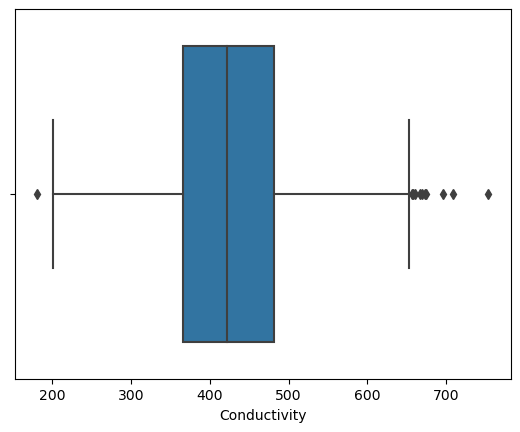

In [33]:
sns.boxplot(Data.Conductivity)

In [34]:
q1 = Data['Conductivity'].quantile(0.25)
q3 = Data['Conductivity'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [35]:
Data['Conductivity']=np.where(Data['Conductivity'] > upper_limit,upper_limit,Data['Conductivity']) # upper limit

In [36]:
Data['Conductivity']=np.where(Data['Conductivity'] < low_limit,low_limit,Data['Conductivity']) # low_limit

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Conductivity'>

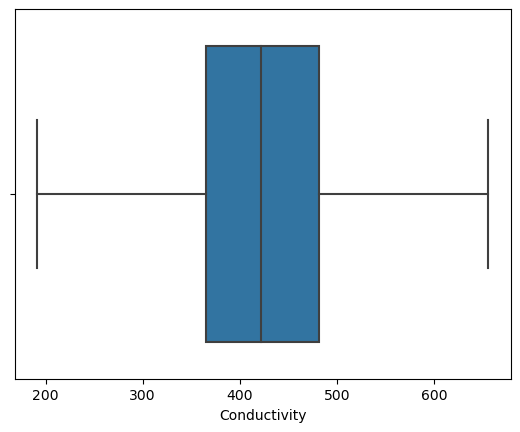

In [37]:
sns.boxplot(Data.Conductivity)

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Organic_carbon'>

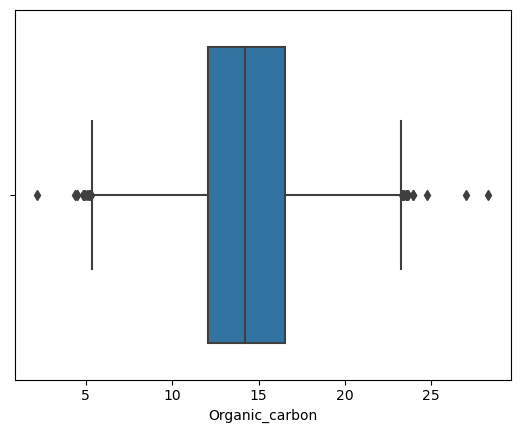

In [38]:
sns.boxplot(Data.Organic_carbon)

In [39]:
q1 = Data['Organic_carbon'].quantile(0.25)
q3 = Data['Organic_carbon'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [40]:
Data['Organic_carbon']=np.where(Data['Organic_carbon'] > upper_limit,upper_limit,Data['Organic_carbon']) # upper limit

In [41]:
Data['Organic_carbon']=np.where(Data['Organic_carbon'] < low_limit,low_limit,Data['Organic_carbon']) # low_limit

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Organic_carbon'>

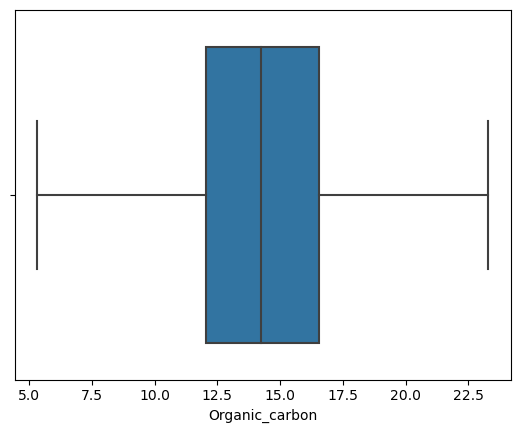

In [42]:
sns.boxplot(Data.Organic_carbon)

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Trihalomethanes'>

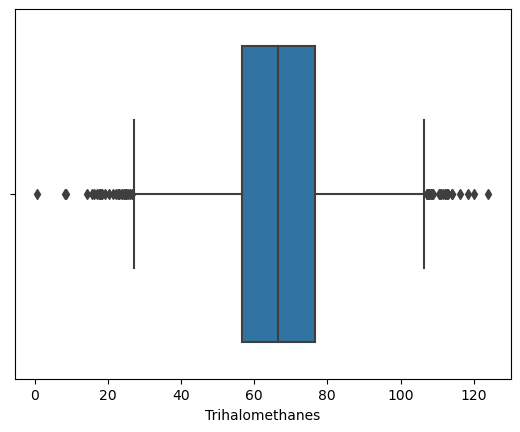

In [43]:
sns.boxplot(Data.Trihalomethanes)

In [44]:
q1 = Data['Trihalomethanes'].quantile(0.25)
q3 = Data['Trihalomethanes'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [45]:
Data['Trihalomethanes']=np.where(Data['Trihalomethanes'] > upper_limit,upper_limit,Data['Trihalomethanes']) # upper limit

In [46]:
Data['Trihalomethanes']=np.where(Data['Trihalomethanes'] < low_limit,low_limit,Data['Trihalomethanes']) # low_limit

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Trihalomethanes'>

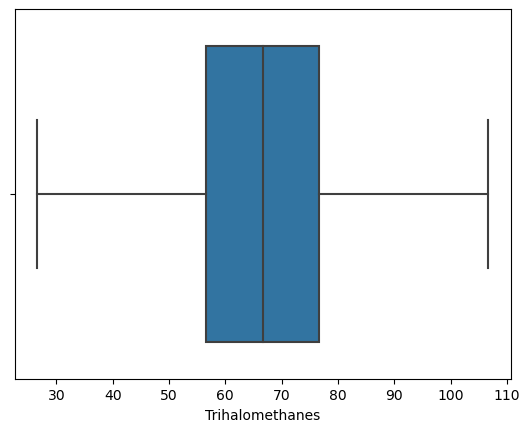

In [47]:
sns.boxplot(Data.Trihalomethanes)

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Turbidity'>

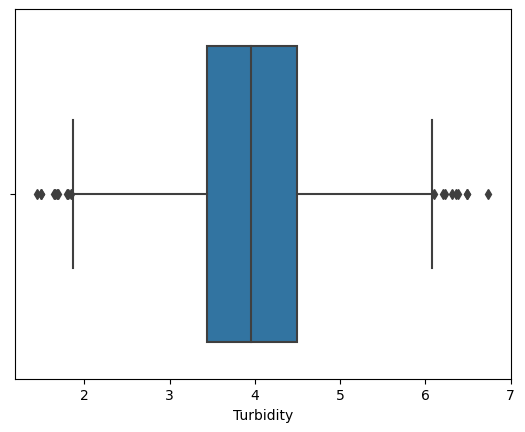

In [48]:
sns.boxplot(Data.Turbidity)

In [49]:
q1 = Data['Turbidity'].quantile(0.25)
q3 = Data['Turbidity'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [50]:
Data['Turbidity']=np.where(Data['Turbidity'] > upper_limit,upper_limit,Data['Turbidity']) # upper limit

In [51]:
Data['Turbidity']=np.where(Data['Turbidity'] < low_limit,low_limit,Data['Turbidity']) # low_limit

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Turbidity'>

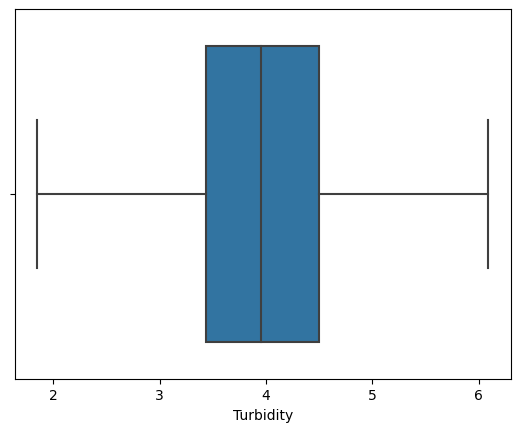

In [52]:
sns.boxplot(Data.Turbidity)

In [53]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


In [54]:
Data.select_dtypes(include=[np.number]).columns.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [55]:
Quantitative_Variable = Data[Data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.889107,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934


In [56]:
Qualitative_Variable = Data[Data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Potability
0,not potable
1,not potable
2,not potable


In [57]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Potability
0,0
1,0
2,0
3,0
4,0


In [58]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,0,3.889107,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,0,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,0,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [59]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = Final_combined.drop(['Potability'],axis=1)
y = Final_combined[['Potability']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

In [60]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [61]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
947,0,6.783888,193.653581,13677.10644,5.171454,323.728663,477.854687,15.056064,66.622485,3.250022
1502,1,9.917092,196.603746,37215.22684,7.408018,267.157960,522.548553,5.512040,77.830816,3.393325
3104,0,8.631270,164.371169,14880.65180,7.278263,350.951581,444.108112,16.857459,58.177867,3.640944
3093,0,9.537879,200.557507,20044.20625,7.078690,303.919341,335.554803,16.636174,71.309022,3.024557
2059,0,7.031684,201.002106,24510.50756,5.818274,400.322434,371.616397,12.846819,89.192433,4.422183


In [62]:
independent_variable = list(train.columns[1:])
independent_variable

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

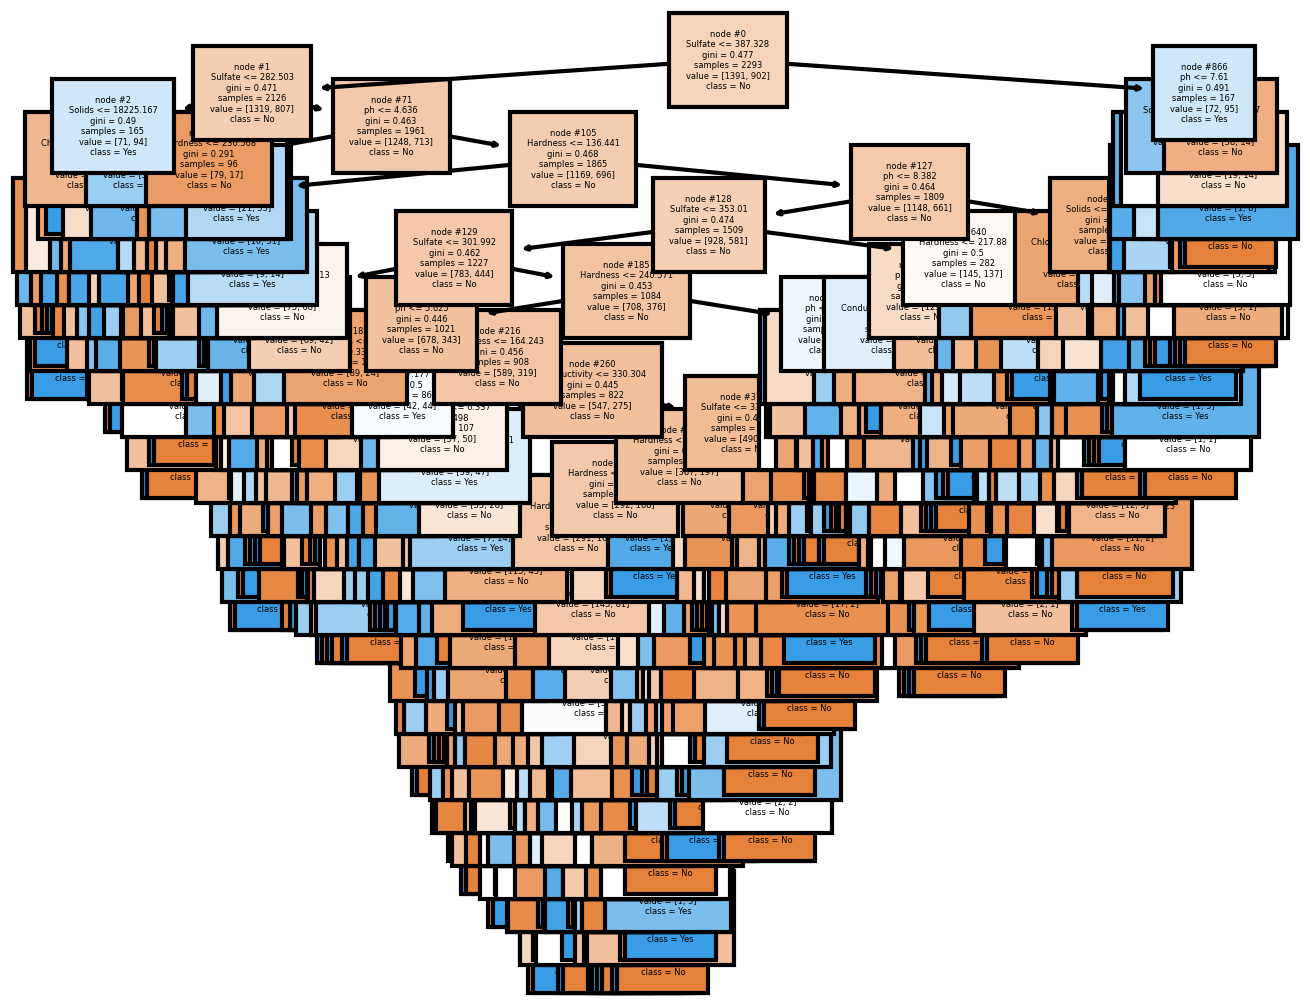

In [63]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [64]:
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
947,0,6.783888,193.653581,13677.10644,5.171454,323.728663,477.854687,15.056064,66.622485,3.250022
1502,1,9.917092,196.603746,37215.22684,7.408018,267.157960,522.548553,5.512040,77.830816,3.393325
3104,0,8.631270,164.371169,14880.65180,7.278263,350.951581,444.108112,16.857459,58.177867,3.640944
3093,0,9.537879,200.557507,20044.20625,7.078690,303.919341,335.554803,16.636174,71.309022,3.024557
2059,0,7.031684,201.002106,24510.50756,5.818274,400.322434,371.616397,12.846819,89.192433,4.422183


In [65]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predicted
947,0,6.783888,193.653581,13677.10644,5.171454,323.728663,477.854687,15.056064,66.622485,3.250022,0
1502,1,9.917092,196.603746,37215.22684,7.408018,267.157960,522.548553,5.512040,77.830816,3.393325,1
3104,0,8.631270,164.371169,14880.65180,7.278263,350.951581,444.108112,16.857459,58.177867,3.640944,0
3093,0,9.537879,200.557507,20044.20625,7.078690,303.919341,335.554803,16.636174,71.309022,3.024557,0
2059,0,7.031684,201.002106,24510.50756,5.818274,400.322434,371.616397,12.846819,89.192433,4.422183,0


In [66]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1391    0]
 [   0  902]]


In [67]:
Accuracy_Train=((1391+902)/(2293)*100)
print(Accuracy_Train)   # overfit or High accuracy

100.0


In [68]:
from sklearn.metrics import classification_report
print(classification_report(train['Potability'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1391
           1       1.00      1.00      1.00       902

    accuracy                           1.00      2293
   macro avg       1.00      1.00      1.00      2293
weighted avg       1.00      1.00      1.00      2293



In [69]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=200, ## child
                                 min_samples_split=50, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=200, min_samples_split=50)

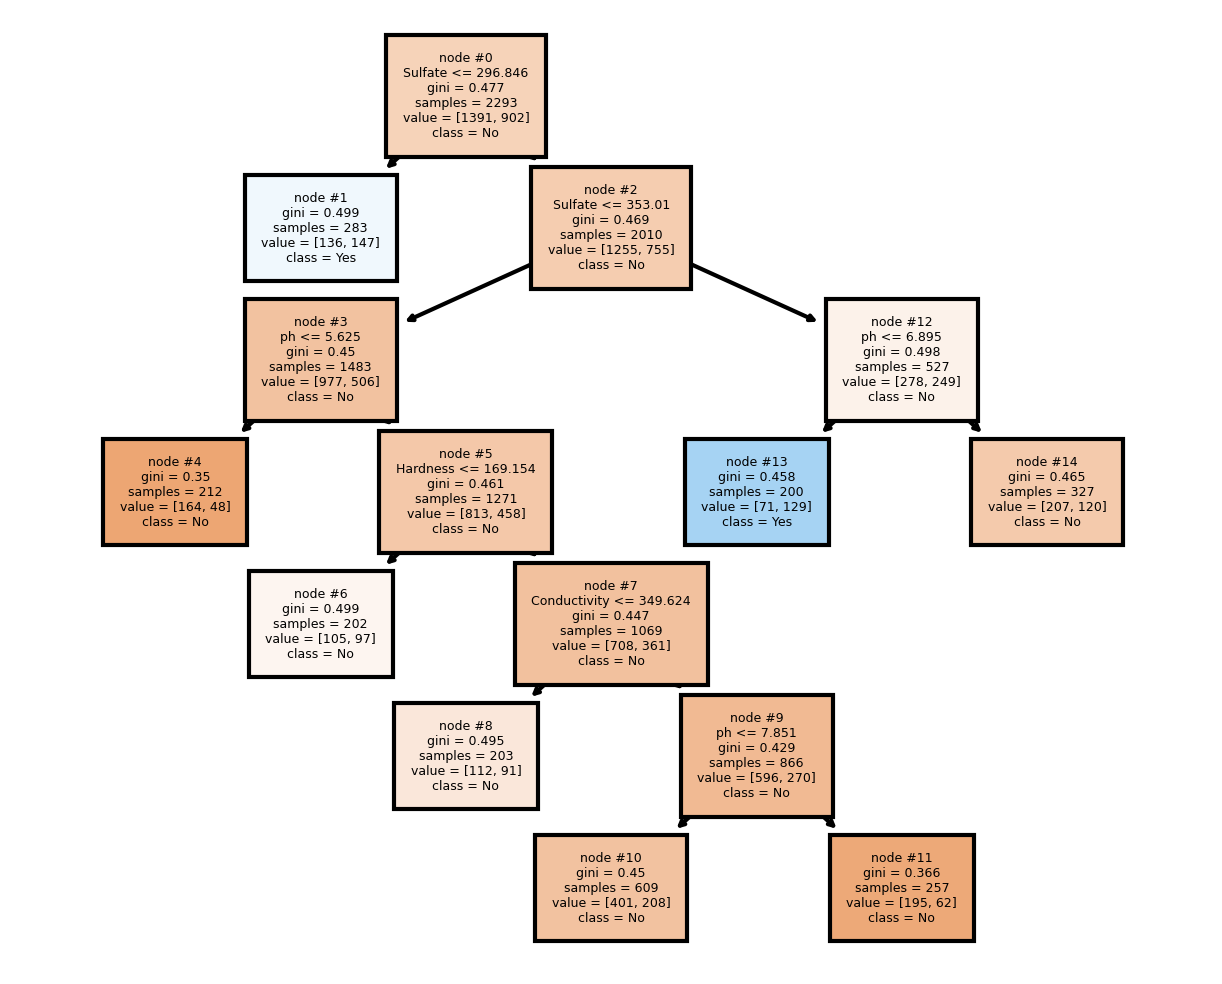

In [70]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [71]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predicted
947,0,6.783888,193.653581,13677.10644,5.171454,323.728663,477.854687,15.056064,66.622485,3.250022,0
1502,1,9.917092,196.603746,37215.22684,7.408018,267.157960,522.548553,5.512040,77.830816,3.393325,1
3104,0,8.631270,164.371169,14880.65180,7.278263,350.951581,444.108112,16.857459,58.177867,3.640944,0
3093,0,9.537879,200.557507,20044.20625,7.078690,303.919341,335.554803,16.636174,71.309022,3.024557,0
2059,0,7.031684,201.002106,24510.50756,5.818274,400.322434,371.616397,12.846819,89.192433,4.422183,0


In [72]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1184  626]
 [ 207  276]]


In [79]:
Accuracy_Train=((1184+276)/(2293)*100)
print(Accuracy_Train)

63.67204535542956


In [74]:
from sklearn.metrics import classification_report
print(classification_report(train['Potability'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74      1391
           1       0.57      0.31      0.40       902

    accuracy                           0.64      2293
   macro avg       0.61      0.58      0.57      2293
weighted avg       0.62      0.64      0.61      2293



In [75]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
452,7.040245,192.955983,20988.42941,6.422359,320.948844,381.357350,15.396455,88.298465,3.993410,0
124,8.550875,231.248787,28918.41995,7.822528,369.264223,432.285270,16.266297,73.149464,3.772887,0
2000,7.442023,194.763871,34565.70169,8.493348,294.836218,350.085115,18.962014,79.958321,2.894651,1
1476,6.730884,192.436076,22296.05965,7.450541,333.073546,326.350745,11.827401,66.622485,4.359137,0
1658,6.090016,216.736232,12558.89797,9.297300,317.983236,409.427236,10.754842,30.965844,2.943522,0


In [76]:
test['Predicted']=dt.predict(X_test)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
452,7.040245,192.955983,20988.42941,6.422359,320.948844,381.357350,15.396455,88.298465,3.993410,0,0
124,8.550875,231.248787,28918.41995,7.822528,369.264223,432.285270,16.266297,73.149464,3.772887,0,0
2000,7.442023,194.763871,34565.70169,8.493348,294.836218,350.085115,18.962014,79.958321,2.894651,1,1
1476,6.730884,192.436076,22296.05965,7.450541,333.073546,326.350745,11.827401,66.622485,4.359137,0,0
1658,6.090016,216.736232,12558.89797,9.297300,317.983236,409.427236,10.754842,30.965844,2.943522,0,0


In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Potability'])
print(confusion_matrix)

[[510 269]
 [ 97 107]]


In [78]:
Accuracy_test=((510+107)/(983)*100)
Accuracy_test

62.76703967446592

In [80]:
from sklearn.metrics import classification_report
print(classification_report(train['Potability'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74      1391
           1       0.57      0.31      0.40       902

    accuracy                           0.64      2293
   macro avg       0.61      0.58      0.57      2293
weighted avg       0.62      0.64      0.61      2293



In [81]:
from sklearn.metrics import classification_report
print(classification_report(test['Potability'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.74       607
           1       0.52      0.28      0.37       376

    accuracy                           0.63       983
   macro avg       0.59      0.56      0.55       983
weighted avg       0.60      0.63      0.60       983



In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 70, 80],
                         'min_samples_split': [100, 200, 270]},
             verbose=1)

In [83]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=100,
                       random_state=42)